170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.3315 - loss: 1.8049 - val_accuracy: 0.5297 - val_loss: 1.2883
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.5741 - loss: 1.1957 - val_accuracy: 0.6019 - val_loss: 1.1257
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.6447 - loss: 1.0179 - val_accuracy: 0.6218 - val_loss: 1.0789
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - accuracy: 0.6742 - loss: 0.9268 - val_accuracy: 0.6728 - val_loss: 0.9428
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 44ms/step - accuracy: 0.7053 - loss: 0.8406 - val_accuracy: 0.6789 - val_loss: 0.9321
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7311 - loss: 0.7721 - val_accuracy: 0.6933 - val_loss: 0.8879
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7476 - loss: 0.7225 - val_accuracy: 0.7029 - val_loss: 0.8748
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7612 -

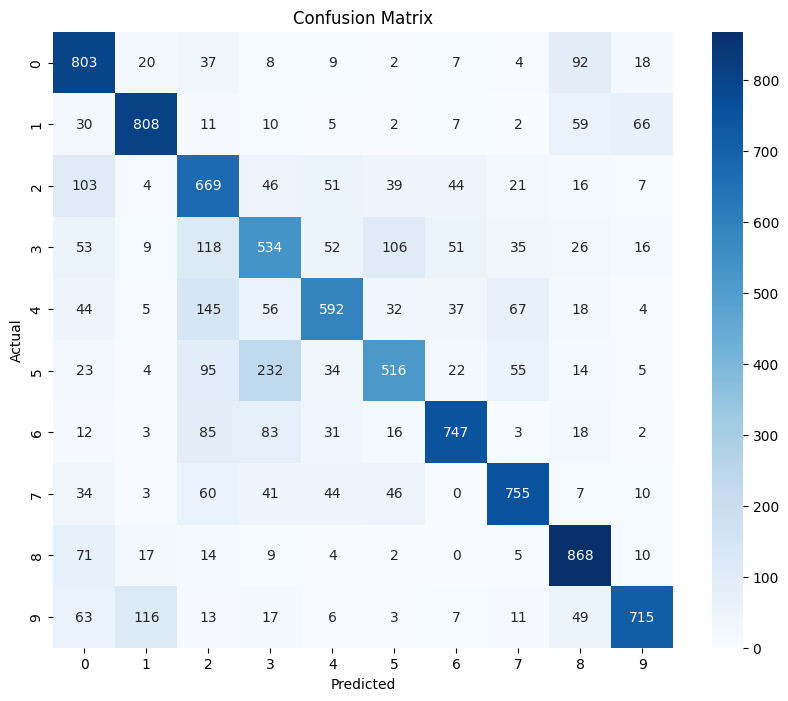

In [ ]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Step 2: Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images
y_train = y_train.flatten()
y_test = y_test.flatten()

# Step 3: Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.2f}")

# Step 7: Classification report and confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
